<a href="https://colab.research.google.com/github/ldruizsan/Coursera-Python/blob/IBM/DataVisualizationPython_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create the dataframe
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/Topic_Survey_Assignment.csv', index_col=0)

In [3]:
# Print Dataframe
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [4]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

In [5]:
interest = ['Very interested','Somewhat interested', 'Not interested']
tech = ['Big Data (Spark / Hadoop', 'Data Analysis / Statistics', 'Data Journalism','Data Visualization', 'Deep Learning','Machine Learning']

In [6]:
# Sort dataframe in descending order of Very Interested
df.sort_values(by='Very interested', ascending=False)

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [7]:
# Convert the numbers into percentages of the total number of correspondents, 2233
correspondents = 2233

percent_df = round((df[interest]/correspondents), 2)
percent_df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),0.60,0.33,0.06
Data Analysis / Statistics,0.76,0.20,0.03
Data Journalism,0.19,0.48,0.27
Data Visualization,0.60,0.33,0.05
Deep Learning,0.57,0.34,0.06
Machine Learning,0.73,0.21,0.03


In [8]:
percent_df.loc[tech[4],interest[2]]

0.06

<Figure size 432x288 with 0 Axes>

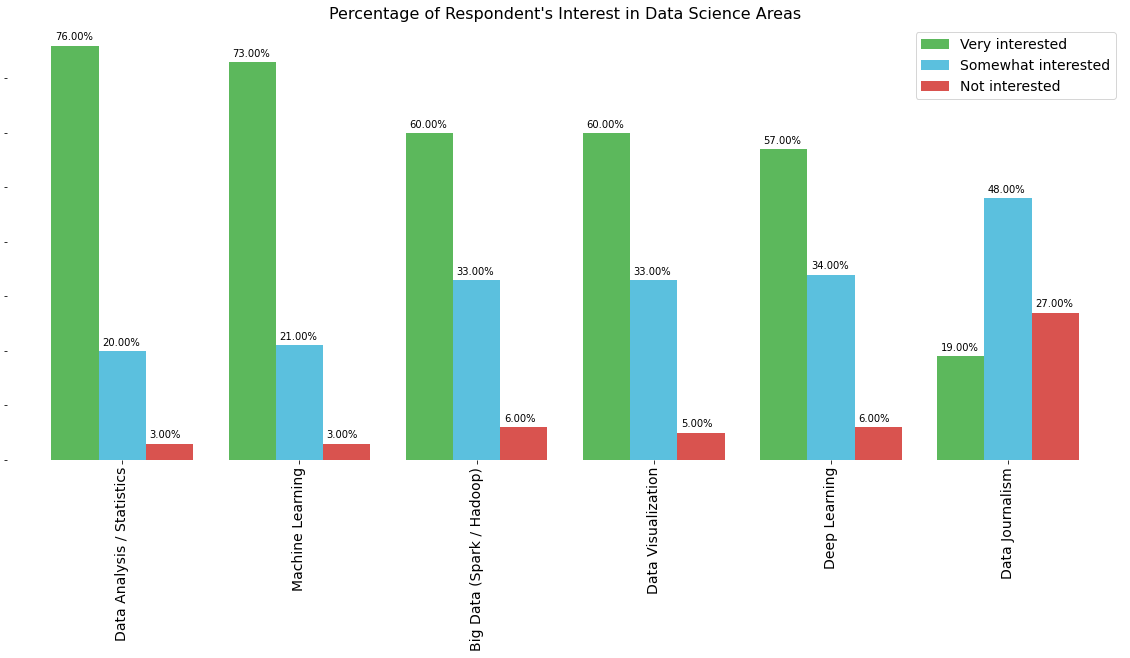

In [9]:
percent_df = percent_df.sort_values(by='Very interested',ascending=False)
fig = plt.figure()
ax = percent_df.plot(kind='bar',
                     figsize=(20,8),
                     color = ('#5cb85c', '#5bc0de', '#d9534f'),
                     legend=True,
                     fontsize=14,
                     width=0.8
                     )
ax.set_title('Percentage of Respondent\'s Interest in Data Science Areas', fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.legend(fontsize=14,loc='upper right')
ax.set_yticklabels([])

for label in ax.patches:
  ax.annotate("{:.2%}".format(label.get_height()),
                xy=(label.get_x()+0.02, label.get_height()+0.01))
fig.savefig('survey.png')

In [10]:
sf = pd.read_csv('/content/drive/MyDrive/Police_Department_Incidents_-_Previous_Year__2016_.csv')
sf.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [11]:
sf.rename(columns={'IncidntNum':'Incident','PdDistrict':'Neighborhood'},inplace=True)
sf.head()

,Incident,Category,Descript,DayOfWeek,Date,Time,Neighborhood,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [12]:
#districts = sf.groupby(by='Neighborhood').size().reset_index(name='Count')
districts = sf.groupby(by='Neighborhood',as_index=False).count()
districts.drop(columns=['Incident','Category','Descript','DayOfWeek','Date','Time','Resolution','Address','X','Y','PdId'],inplace=True)
districts.rename(columns={'Location':'Count'},inplace=True)
districts

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [13]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [14]:
# download San Francisco geojson file
!wget --quiet 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/san-francisco.geojson'
print('GeoJSON file downloaded successfully!')

GeoJSON file downloaded successfully!


In [15]:
import folium
import json
gjson = r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/san-francisco.geojson'

with open('/content/san-francisco.geojson') as f:
  sf_counties = json.load(f)

for i in sf_counties['features']:
  i['id'] = i['properties']['DISTRICT']

sf_map_choropleth = folium.Map(location=[latitude,longitude],zoom_start=12)
sf_map_choropleth

In [16]:
folium.Choropleth(
    geo_data=sf_counties,
    name='choropleth',
    data=districts,
    columns=['Neighborhood','Count'],
    key_on = 'feature.id',
    fill_color = 'YlOrRd',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name='Crime Rate in San Francisco'
).add_to(sf_map_choropleth)
sf_map_choropleth

In [17]:
# Export the map as a .png file
sf_map_choropleth.save('sf_choropleth.png')